# Reto 02
A continuación vas a desarrollar por tu propia cuenta una clusterización pero ahora con un dataset con el doble de dimensiones. Contarás con el apoyo de los TA y el Experto para que puedas desarrollar el reto que a continuación vas a resolver. Lee a detalle cada una de las instrucciones contenidas en cada paso. Éxito.

# Paso 1: Genera un Análisis Exploratorio básico de las variables con las que cuentas, tratandos de responder las siguientes preguntas
- Cuantas variables tienes y de que tipo son
- Como se distirbuyen tus variables
- Cuantas observaciones tienes

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('wine-challenge.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          99 non-null     float64
 1   Malic_Acid       99 non-null     float64
 2   Ash              99 non-null     float64
 3   Ash_Alcanity     99 non-null     float64
 4   Magnesium        99 non-null     int64  
 5   Color_Intensity  99 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
0,14.23,1.71,2.43,15.6,127,5.64
1,13.20,1.78,2.14,11.2,100,4.38
2,13.16,2.36,2.67,18.6,101,5.68
3,14.37,1.95,2.50,16.8,113,7.80
4,13.24,2.59,2.87,21.0,118,4.32


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,12.985253,1.958485,2.340101,18.764646,100.414141,4.253434
std,0.865526,0.887749,0.280970,3.476108,15.701950,1.598098
min,11.030000,0.890000,1.360000,10.600000,70.000000,1.280000
25%,12.290000,1.500000,2.195000,16.550000,88.000000,2.900000
50%,13.050000,1.710000,2.320000,18.000000,98.000000,4.250000
75%,13.745000,2.055000,2.505000,20.900000,108.000000,5.415000
max,14.830000,5.800000,3.230000,30.000000,162.000000,8.900000


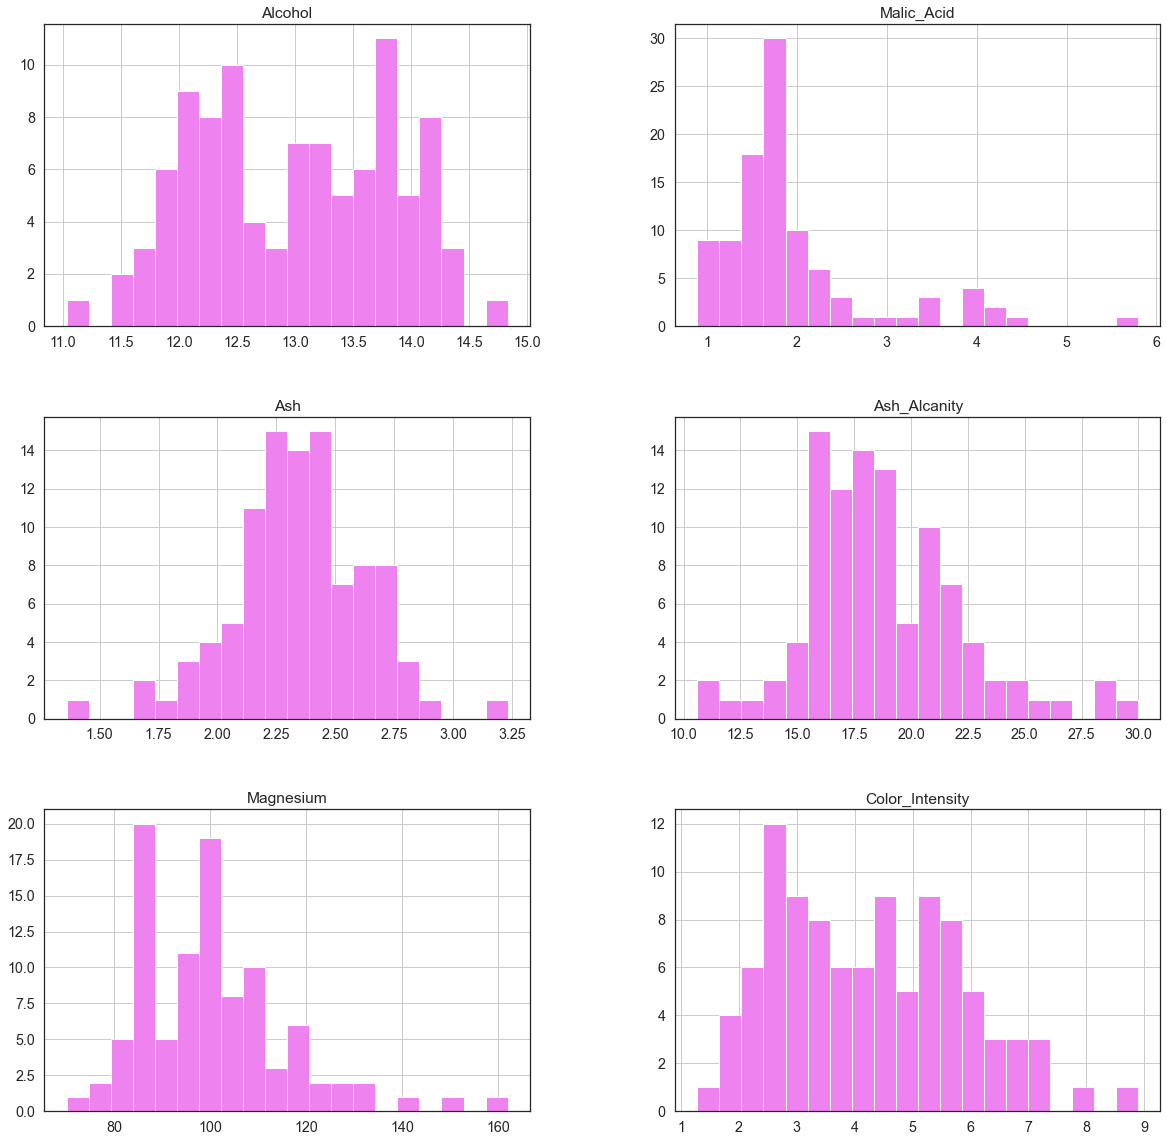

In [6]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='violet' )

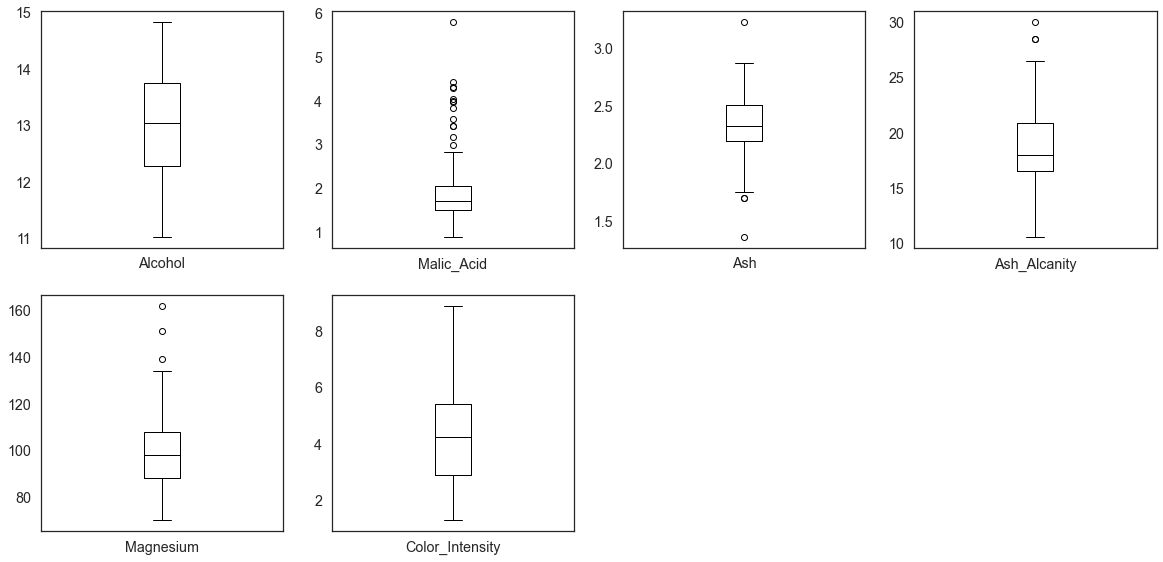

In [7]:
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

# Paso 2: Estandarice y genere una nueva escala
¿Recuerda lo comentado respecto a que manejar distintas escalas puede estropear nuestra clusterización? Aunque tengamos menos variables, sucede lo mismo. Genere una nueva escala y estandarice los datos.

In [8]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=data.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [9]:
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,2.189607e-16,-2.736307e-16,2.596128e-16,1.233581e-16,1.561602e-16,-1.110223e-16
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00
min,-2.270530e+00,-1.209714e+00,-3.506035e+00,-2.360743e+00,-1.946823e+00,-1.870077e+00
25%,-8.073595e-01,-5.190859e-01,-5.190579e-01,-6.403474e-01,-7.946350e-01,-8.512133e-01
50%,7.518778e-02,-2.813288e-01,-7.190569e-02,-2.210914e-01,-1.545303e-01,-2.159956e-03
75%,8.822541e-01,1.092722e-01,5.898796e-01,6.174205e-01,4.855743e-01,7.305416e-01
max,2.142206e+00,4.349274e+00,3.183362e+00,3.248613e+00,3.942139e+00,2.922357e+00


# Paso 3: Ahora reduzca de 6 a solo 2 dimensiones
importe PCA de sklearn.decomposition y genere 2 nuevas dimensiones que "resuman" a las 6 originales

In [10]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)

print ('Varianza acumulada explicada por 2 componentes principales: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por 2 componentes principales: 62.66%


# Paso 4: Grafique las dos dimensiones que acaba de generar

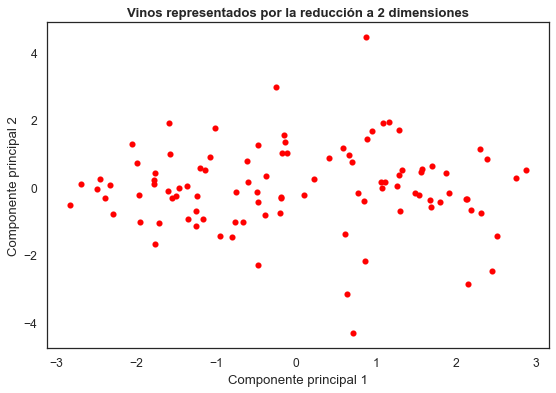

In [11]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Vinos representados por la reducción a 2 dimensiones',fontweight='bold')
plt.show()

# Paso 5: Decida cuantos clusters usted necesita
Ahora, usted deberá emplear uno de los métodos que el Experto le ha enseñado:
- Método del Codo
- Método de la Silueta
- Método de la inercia

Con base en él, escriba el código pertinente y argumente su decisión de número de clusters

- CONSEJO: Le será confuso elegir con un solo método. Le recomiendo ampliamente usar dos.

In [12]:
# INERCIA

import sklearn.cluster as cluster

inertia = []
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

In [13]:
# SILUETA

from sklearn.metrics import silhouette_score

silhouette = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

# Paso 6: Gráfique el método que empleó
Junto con Matplotlib y Seaborn (si es el caso), grafique el método de decisión de Clusters que usted usó en el paso anterior

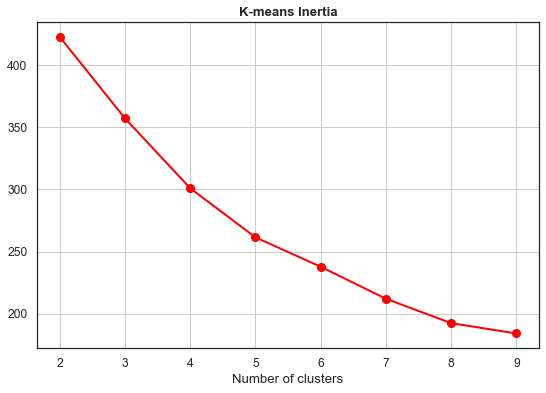

In [14]:
plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

Text(0.5, 0, 'Número de Clusters')

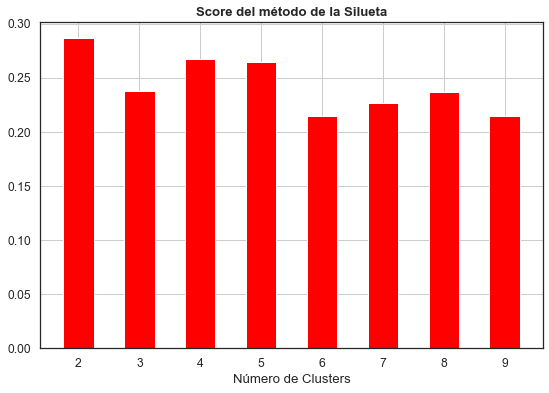

In [15]:
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Score del método de la Silueta',fontweight='bold')
plt.xlabel('Número de Clusters')

# Paso 7: Defina su clusterización
Ahora, usted deberá emplear el número de clusters que decidió en el paso anterior con base en el ejemplo desarrollado por el experto. 
- Recuerde definir una nueva variable donde almacenará KMeans()
- Defina una segunda variable donde almacene sus centrodes, derivado de la primera (.cluster_centers_)

In [17]:
kmeans = cluster.KMeans(n_clusters=2,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

0    54
1    45
dtype: int64

# Paso 8: Genere un breve EDA de sus variables clusterizadas
Puede generar histogramas o distintas visualizaciones de sus variabels clusterizadas. Paso libre

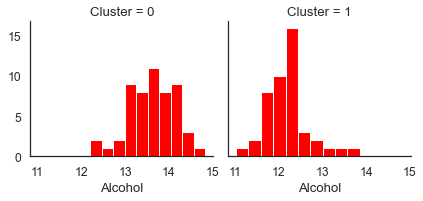

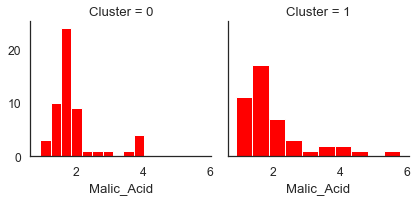

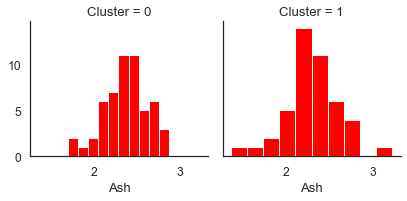

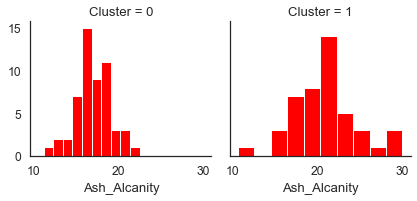

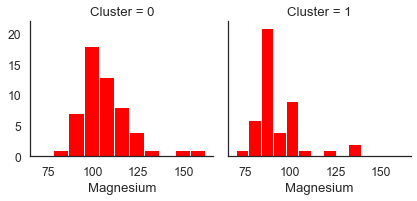

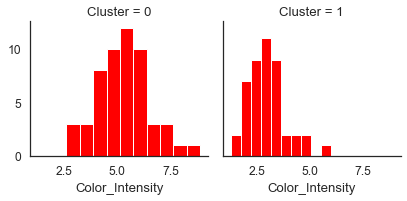

In [18]:
data2=data.copy()
data2['Cluster']=kmeans_labels

aux=data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data2, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

# Paso 9: Visualice los clusters en el plano cartesiano
Genere una visualización de los clusters que usted decidió emplear dada la reducción de dimensiones y los clusters que generó

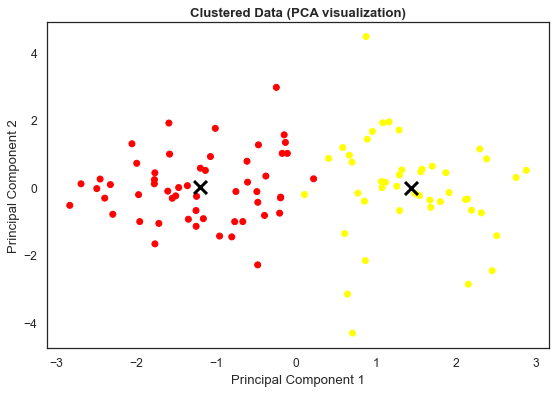

In [19]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

In [20]:
print(centroids_pca[:, 0])

[-1.1978049   1.43736588]
